# **Importing Required Libraries**  

In [14]:
import pandas as pd 
import urllib.parse
import numpy as np 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

## **Data Gathering**

In [16]:
username = "root"
password = urllib.parse.quote_plus("Am1221221Am@")  
host = "127.0.0.1"
database = "sakila"
engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}/{database}")

In [18]:
query = "SELECT * FROM shopping_trends"
shopping_trends = pd.read_sql(query, engine)

In [50]:
# shopping_trends = pd.read_csv("data_set/shopping_trends.csv")

In [20]:
shopping_trends

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts    S     Maroon  Spring   
3                        90   Rhode Island    M     Maroon  Spring   
4                        49         Oregon    M  Turquoise  Spring   
...                     ...            ...  ...        ...     ...   
3895                     28       Virginia    L  Turquoise  Summer   
3896                     49           Iowa    L      White  Spring   
3897                     33     New Jersey    L      Green  Spring   
3898                     77      Minnesota    S      Brown  Summer   
3899                     81     California    M      Beige  Spring   

      Review Rating Subscription Status Payment Method   Shipping Type  \
0               3.1                 Yes    Credit Card         Express   
1               3.1                 Yes  Bank Transfer         Express   
2               3.1                 Yes           Cash   Free Shipping   
3               3.5                 Yes         PayPal    Next Day Air   
4               2.7                 Yes           Cash   Free Shipping   
...             ...                 ...            ...             ...   
3895            4.2                  No           Cash  2-Day Shipping   
3896            4.5                  No         PayPal    Store Pickup   
3897            2.9                  No    Credit Card        Standard   
3898            3.8                  No         PayPal         Express   
3899            3.1                  No  Bank Transfer    Store Pickup   

     Discount Applied Promo Code Used  Previous Purchases  \
0                 Yes             Yes                  14   
1                 Yes             Yes                   2   
2                 Yes             Yes                  23   
3                 Yes             Yes                  49   
4                 Yes             Yes                  31   
...               ...             ...                 ...   
3895               No              No                  32   
3896               No              No                  41   
3897               No              No                  24   
3898               No              No                  24   
3899               No              No                  33   

     Preferred Payment Method Frequency of Purchases  
0                       Venmo            Fortnightly  
1                        Cash            Fortnightly  
2                 Credit Card                 Weekly  
3                      PayPal                 Weekly  
4                      PayPal               Annually  
...                       ...                    ...  
3895                    Venmo                 Weekly  
3896            Bank Transfer              Bi-Weekly  
3897                    Venmo              Quarterly  
3898                    Venmo                 Weekly  
3899                    Venmo              Quarterly  

[3900 rows x 19 columns]

## **Data Representation**

In [22]:
shopping_trends.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous Purchases Preferred Payment Method Frequency of Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

In [57]:
shopping_trends.drop(["Customer ID"], axis=1, inplace=True)
shopping_trends.head(2)

Age Gender Item Purchased  Category  Purchase Amount (USD)  Location Size  \
0   55   Male         Blouse  Clothing                     53  Kentucky    L   
1   19   Male        Sweater  Clothing                     64     Maine    L   

    Color  Season  Review Rating Subscription Status Payment Method  \
0    Gray  Winter            3.1                 Yes    Credit Card   
1  Maroon  Winter            3.1                 Yes  Bank Transfer   

  Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0       Express              Yes             Yes                  14   
1       Express              Yes             Yes                   2   

  Preferred Payment Method Frequency of Purchases  
0                    Venmo            Fortnightly  
1                     Cash            Fortnightly

In [59]:
shopping_trends.describe()

Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.000000            3900.000000    3900.000000         3900.000000
mean     44.068462              59.764359       3.749949           25.351538
std      15.207589              23.685392       0.716223           14.447125
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.700000           25.000000
75%      57.000000              81.000000       4.400000           38.000000
max      70.000000             100.000000       5.000000           50.000000

In [61]:
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Co

In [63]:
shopping_trends.shape

(3900, 18)

## **Check missing Value**

In [66]:
shopping_trends.isna().sum()

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

## **check Duplicated Value**

In [69]:
shopping_trends.duplicated().sum()

0

## **Exploarity Data Analysis**

In [72]:
shopping_trends.sample(2)

Age  Gender Item Purchased   Category  Purchase Amount (USD)  \
2992   41  Female          Socks   Clothing                     64   
273    69    Male           Coat  Outerwear                     33   

          Location Size     Color  Season  Review Rating Subscription Status  \
2992  North Dakota    M  Charcoal  Spring            3.9                  No   
273   North Dakota    S    Silver  Spring            4.2                 Yes   

     Payment Method Shipping Type Discount Applied Promo Code Used  \
2992  Bank Transfer  Store Pickup               No              No   
273            Cash       Express              Yes             Yes   

      Previous Purchases Preferred Payment Method Frequency of Purchases  
2992                  25                    Venmo                 Weekly  
273                   32               Debit Card              Quarterly

In [74]:
shopping_trends["Age"].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

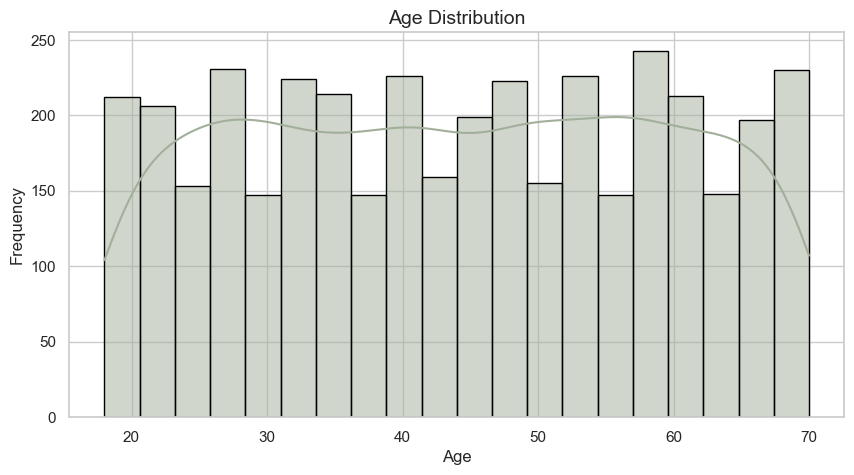

In [845]:
plt.figure(figsize=(10, 5))
sns.histplot(shopping_trends["Age"],bins=20, kde="True",color="#A2AF9B", edgecolor='black')
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [92]:
gender_counts = shopping_trends.Gender.value_counts(normalize=True) * 100
gender_counts

Gender
Male      68.0
Female    32.0
Name: proportion, dtype: float64

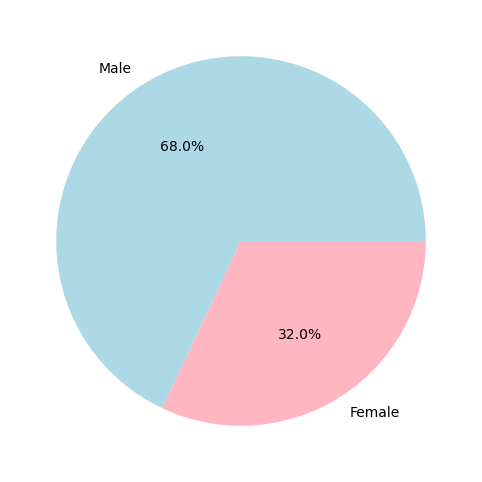

In [94]:
plt.figure(figsize=(10,6))
plt.pie(gender_counts , labels=gender_counts.index, colors=["lightblue","lightpink"], autopct='%1.1f%%')
plt.show()

In [100]:
Item_Purchased_counts = shopping_trends["Item Purchased"].value_counts()
Item_Purchased_counts

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

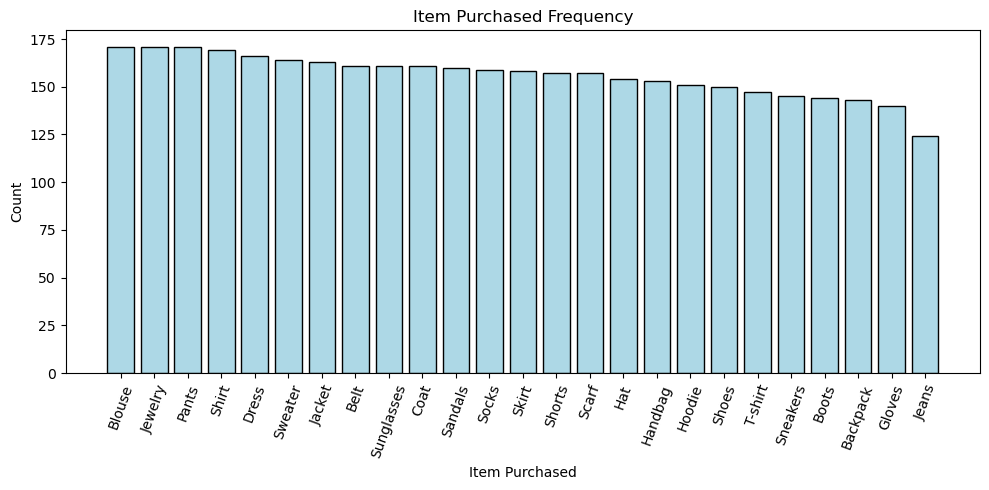

In [102]:
plt.figure(figsize=(10, 5))
plt.bar(Item_Purchased_counts.index, Item_Purchased_counts.values, color='lightblue', edgecolor='black')
plt.title("Item Purchased Frequency")
plt.xlabel("Item Purchased")
plt.ylabel("Count")
# plt.yticks([0,175])
plt.yticks(range(0, 176, 25)) 
plt.xticks(rotation=70) 
plt.tight_layout()
plt.show()


In [106]:
category_counts = shopping_trends.Category.value_counts()
category_counts

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

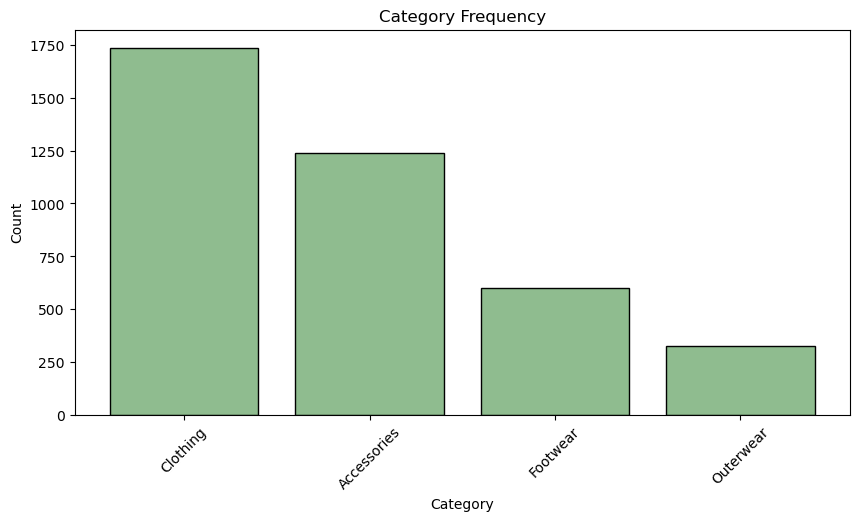

In [116]:
plt.figure(figsize=(10, 5))
plt.bar(category_counts.index, category_counts.values, color='DarkSeaGreen', edgecolor='black')
plt.title("Category Frequency")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

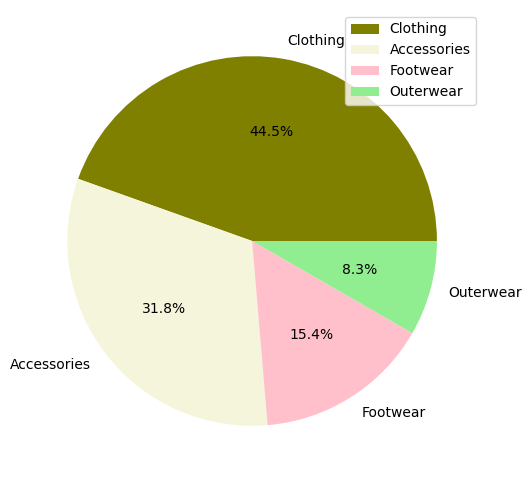

In [208]:
plt.figure(figsize=(10, 6))
plt.pie(category_counts,labels=category_counts.index, colors=["Olive", "Beige", "Pink", "lightGreen"], autopct='%1.1f%%')
plt.legend(labels = category_counts.index, loc = "upper right")
plt.show()

In [138]:
shopping_trends["Purchase Amount (USD)"].describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64

In [142]:
outlier = shopping_trends["Purchase Amount (USD)"].mean() + (shopping_trends["Purchase Amount (USD)"].std() * 3 )
outlier

130.8205357269849

In [186]:
shopping_trends.Size.value_counts(normalize=True) * 100

Size
M     45.0
L     27.0
S     17.0
XL    11.0
Name: proportion, dtype: float64

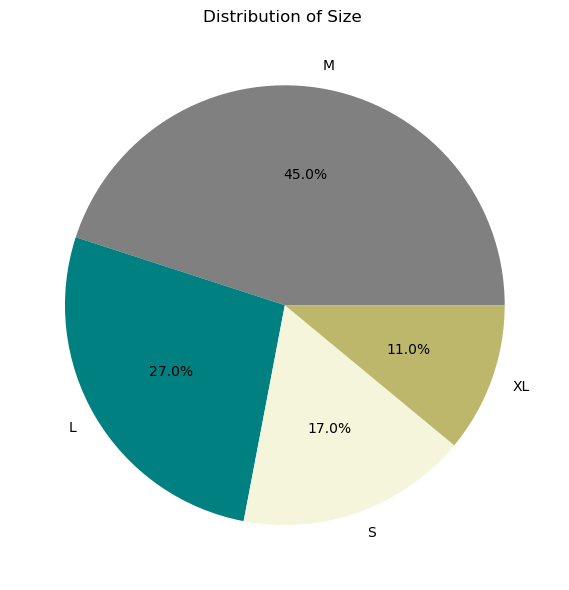

In [295]:
plt.figure(figsize=(10, 6))
shopping_trends["Size"].value_counts().plot( kind="pie",colors=['Gray', 'Teal', 'Beige', '#BDB76B'],autopct="%1.1f%%")
plt.title("Distribution of Size ")
plt.ylabel("") 
plt.tight_layout()
plt.show()

In [260]:
shopping_trends.Color.value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

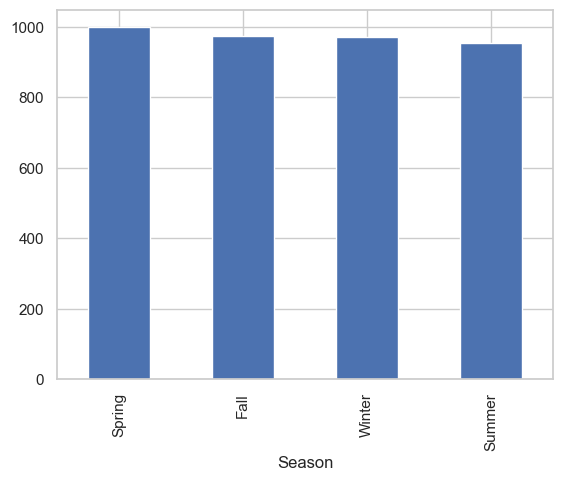

In [783]:
shopping_trends.Season.value_counts().plot(kind = "bar")
plt.show()

In [272]:
shopping_trends.sample()

Age  Gender Item Purchased     Category  Purchase Amount (USD)  \
3830   22  Female            Hat  Accessories                     27   

          Location Size   Color  Season  Review Rating Subscription Status  \
3830  Pennsylvania    M  Indigo  Summer            3.0                  No   

     Payment Method   Shipping Type Discount Applied Promo Code Used  \
3830         PayPal  2-Day Shipping               No              No   

      Previous Purchases Preferred Payment Method Frequency of Purchases  
3830                  33            Bank Transfer         Every 3 Months

In [291]:
shopping_trends["Review Rating"].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64

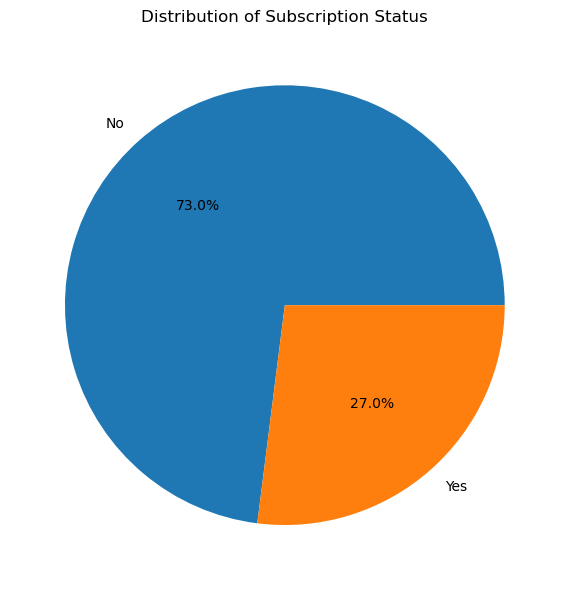

In [293]:
plt.figure(figsize=(10, 6))
shopping_trends["Subscription Status"].value_counts().plot( kind="pie",autopct="%1.1f%%")
plt.title("Distribution of Subscription Status")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [297]:
Payment_Method_counts = shopping_trends["Payment Method"].value_counts()
Payment_Method_counts

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

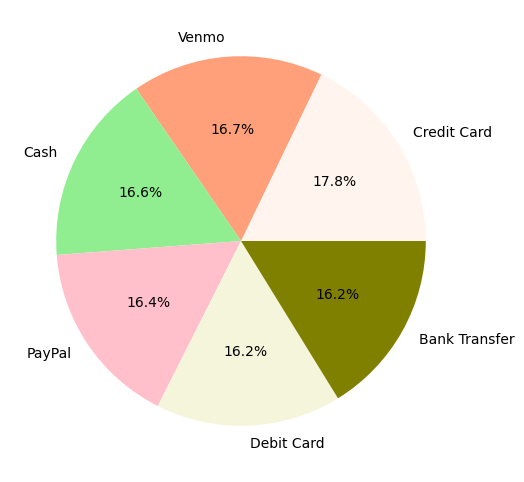

In [299]:
plt.figure(figsize=(10, 6))
plt.pie(Payment_Method_counts,labels=Payment_Method_counts.index, colors=["Seashell", "LightSalmon","lightGreen","Pink", "Beige","Olive"], autopct='%1.1f%%')
plt.show()

In [301]:
shopping_trends.sample(1)

Age Gender Item Purchased  Category  Purchase Amount (USD) Location Size  \
82   19   Male          Pants  Clothing                     28  Georgia    S   

    Color  Season  Review Rating Subscription Status Payment Method  \
82  Olive  Spring            4.0                 Yes  Bank Transfer   

     Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
82  2-Day Shipping              Yes             Yes                  21   

   Preferred Payment Method Frequency of Purchases  
82              Credit Card         Every 3 Months

In [303]:
shopping_trends["Shipping Type"].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

In [311]:
discount_counts = shopping_trends["Discount Applied"].value_counts()
discount_counts

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64

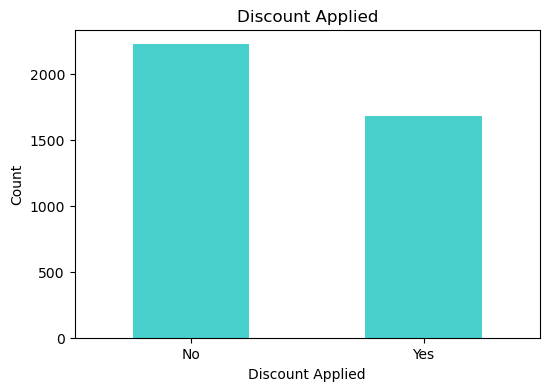

In [317]:
plt.figure(figsize=(6, 4))
discount_counts.plot(kind="bar", color="#48D1CC")  # Teal color
plt.title("Discount Applied")
plt.xlabel("Discount Applied")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [341]:
shopping_trends.sample()

Age Gender Item Purchased     Category  Purchase Amount (USD)  \
1928   25   Male     Sunglasses  Accessories                     92   

         Location Size     Color  Season  Review Rating Subscription Status  \
1928  Mississippi    S  Lavender  Summer            3.7                  No   

     Payment Method Shipping Type Discount Applied Promo Code Used  \
1928         PayPal      Standard               No              No   

      Previous Purchases Preferred Payment Method Frequency of Purchases  
1928                  10                   PayPal                 Weekly

In [347]:
pd.crosstab(shopping_trends.Gender, shopping_trends.Age)

Age     18  19  20  21  22  23  24  25  26  27  ...  61  62  63  64  65  66  \
Gender                                          ...                           
Female  20  27  12  19  28  25  21  21  25  28  ...  23  32  28  19  22  21   
Male    49  54  50  50  38  46  47  64  44  55  ...  42  51  47  54  50  50   

Age     67  68  69  70  
Gender                  
Female  14  22  25  22  
Male    40  53  63  45  

[2 rows x 53 columns]

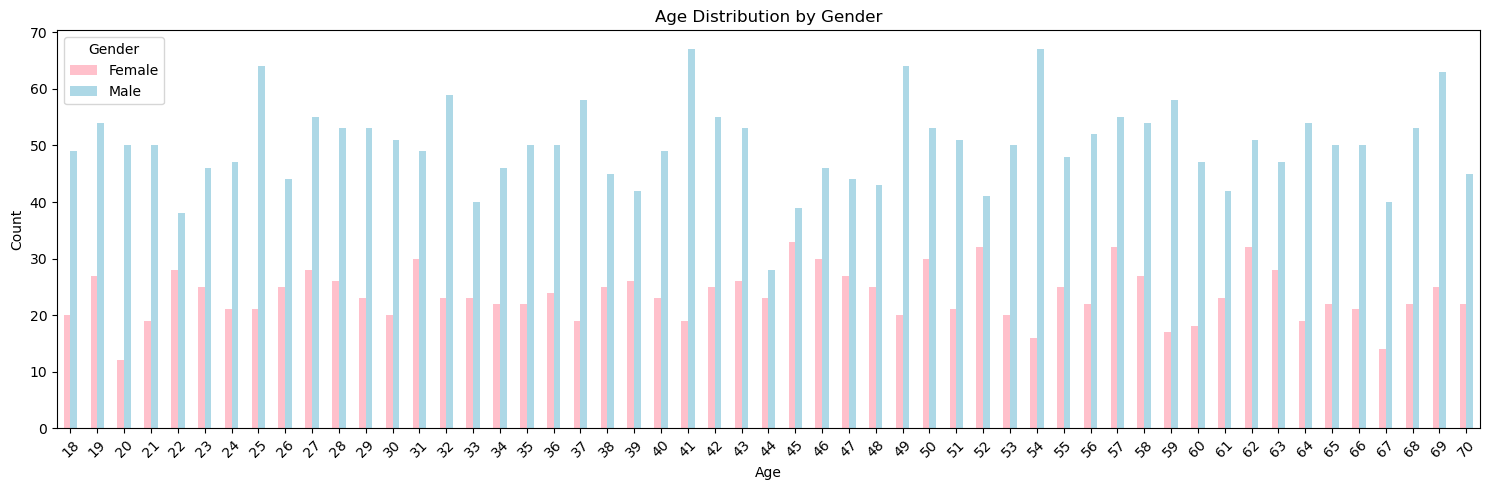

In [381]:

ct = pd.crosstab(shopping_trends['Age'], shopping_trends['Gender'])

ct.plot(kind='bar', figsize=(15, 5), color=["pink","lightblue"]) 

plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


In [387]:
pd.crosstab(shopping_trends.Age, shopping_trends.Gender).mean()

Gender
Female    23.547170
Male      50.037736
dtype: float64

In [400]:
shopping_trends.sample()

Age  Gender Item Purchased   Category  Purchase Amount (USD)  \
3342   66  Female         Jacket  Outerwear                     81   

        Location Size   Color  Season  Review Rating Subscription Status  \
3342  New Jersey    M  Violet  Spring            3.8                  No   

     Payment Method  Shipping Type Discount Applied Promo Code Used  \
3342    Credit Card  Free Shipping               No              No   

      Previous Purchases Preferred Payment Method Frequency of Purchases  
3342                  45              Credit Card                 Weekly

In [442]:
pd.crosstab(shopping_trends.Age , shopping_trends["Item Purchased"])

Item Purchased  Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  Handbag  \
Age                                                                           
18                     1     2       2      3     5      5       4        2   
19                     4     4       4      1     6      5       3        2   
20                     1     6       4      4     2      2       2        4   
21                     2     4       5      2     4      4       1        2   
22                     1     3       1      0     2      3       2        5   
23                     1     0       0      2     5      3       6        2   
24                     2     5       4      0     3      3       3        3   
25                     4     2       3      6     2      4       3        1   
26                     5     3       2      1     5      3       2        0   
27                     2     4       6      4     4      3       3        3   
28                     3     3       2      2     3      1       4        7   
29                     3     5       3      3     3      2       3        2   
30                     2     2       3      1     3      2       3        4   
31                     6     3       3      1     3      4       2        1   
32                     6     5       6      2     1      0       4        4   
33                     3     3       3      4     5      2       3        2   
34                     6     2       2      3     3      3       4        0   
35                     3     1       3      6     2      2       3        3   
36                     4     5       4      4     3      4       2        2   
37                     1     3       4      3     0      4       3        0   
38                     2     4       4      3     2      0       4        2   
39                     6     4       2      2     1      1       4        2   
40                     4     2       1      1     3      5       1        3   
41                     2     5       5      0     3      5       2        3   
42                     4     3       4      4     1      4       2        3   
43                     5     2       6      6     2      1       2        3   
44                     2     2       2      1     2      4       0        1   
45                     3     5       3      0     3      4       2        3   
46                     0     6       1      0     2      5       4        1   
47                     1     2       2      5     3      4       4        2   
48                     1     8       1      4     4      3       1        3   
49                     2     3       2      2     7      4       2        5   
50                     2     2       2      6     2      3       1        3   
51                     4     2       5      8     2      1       2        1   
52                     2     1       4      4     3      4       2        4   
53                     4     1       6      1     4      2       2        6   
54                     3     4       6      1     3      3       1        4   
55                     1     4       6      6     3      2       2        3   
56                     1     1       2      6     1      2       3        5   
57                     1     2       2      1     6      6       4        7   
58                     3     1       3      2     4      2       3        2   
59                     1     3       6      2     8      3       3        2   
60                     6     1       1      1     1      3       2        1   
61                     0     3       3      2     5      5       3        4   
62                     1     6       3      4     5      2       1        6   
63                     2     3       3      2     1      5       2        1   
64                     6     2       2      6     3      3       3        3   
65                     4     0       3      1     2      3       4        2   
66                     2     2       6      0     

In [446]:
pd.crosstab(shopping_trends["Category"],shopping_trends.Age )

Age          18  19  20  21  22  23  24  25  26  27  ...  61  62  63  64  65  \
Category                                             ...                       
Accessories  18  25  16  20  25  19  19  30  24  24  ...  23  29  21  26  24   
Clothing     33  36  35  35  29  29  39  33  27  37  ...  26  36  36  27  33   
Footwear      8  12   8   9   6  14   4  18  10  16  ...   9  10  14  13   6   
Outerwear    10   8   3   5   6   9   6   4   8   6  ...   7   8   4   7   9   

Age          66  67  68  69  70  
Category                         
Accessories  22  16  24  33  25  
Clothing     35  27  31  43  26  
Footwear      8   5  14   7  12  
Outerwear     6   6   6   5   4  

[4 rows x 53 columns]

In [450]:
shopping_trends.groupby("Purchase Amount (USD)")["Age"].mean()

Purchase Amount (USD)
20     44.903846
21     46.391304
22     42.477273
23     42.754386
24     46.000000
         ...    
96     44.962264
97     42.981818
98     41.096154
99     47.903846
100    41.055556
Name: Age, Length: 81, dtype: float64

In [475]:
pd.crosstab(index=shopping_trends["Size"],columns=shopping_trends["Gender"],values=shopping_trends["Age"],aggfunc='count')

Gender  Female  Male
Size                
L          337   716
M          590  1165
S          187   476
XL         134   295

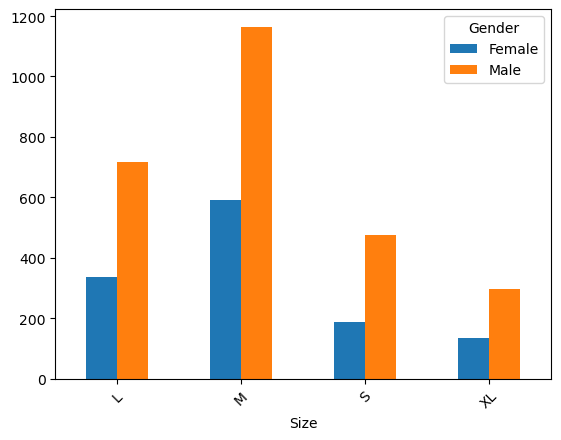

In [473]:
pd.crosstab(index=shopping_trends["Size"],columns=shopping_trends["Gender"],values=shopping_trends["Age"],aggfunc='count').plot(kind="bar")
plt.xticks(rotation=45)
plt.show()

In [533]:
pd.crosstab(shopping_trends["Subscription Status"], shopping_trends["Age"])

Age                  18  19  20  21  22  23  24  25  26  27  ...  61  62  63  \
Subscription Status                                          ...               
No                   55  58  44  46  51  61  46  60  53  61  ...  43  63  56   
Yes                  14  23  18  23  15  10  22  25  16  22  ...  22  20  19   

Age                  64  65  66  67  68  69  70  
Subscription Status                              
No                   45  54  55  39  60  67  46  
Yes                  28  18  16  15  15  21  21  

[2 rows x 53 columns]

In [535]:
shopping_trends.sample()

Age Gender Item Purchased  Category  Purchase Amount (USD) Location  \
1955   50   Male         Hoodie  Clothing                     56    Maine   

     Size Color  Season  Review Rating Subscription Status Payment Method  \
1955    M  Pink  Winter            4.9                  No    Credit Card   

     Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
1955       Express               No              No                  37   

     Preferred Payment Method Frequency of Purchases  
1955                     Cash                Monthly

In [550]:
pd.crosstab(shopping_trends.Gender , shopping_trends["Item Purchased"])

Item Purchased  Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  Handbag  \
Gender                                                                        
Female                37    55      66     50    47     52      37       58   
Male                 106   106     105     94   114    114     103       95   

Item Purchased  Hat  Hoodie  ...  Scarf  Shirt  Shoes  Shorts  Skirt  \
Gender                       ...                                       
Female           52      51  ...     45     59     48      48     49   
Male            102     100  ...    112    110    102     109    109   

Item Purchased  Sneakers  Socks  Sunglasses  Sweater  T-shirt  
Gender                                                         
Female                42     58          56       50       46  
Male                 103    101         105      114      101  

[2 rows x 25 columns]

In [568]:
Product_Category_by_Gender=pd.crosstab(shopping_trends.Gender , shopping_trends["Category"])
Product_Category_by_Gender

Category  Accessories  Clothing  Footwear  Outerwear
Gender                                              
Female            392       556       199        101
Male              848      1181       400        223

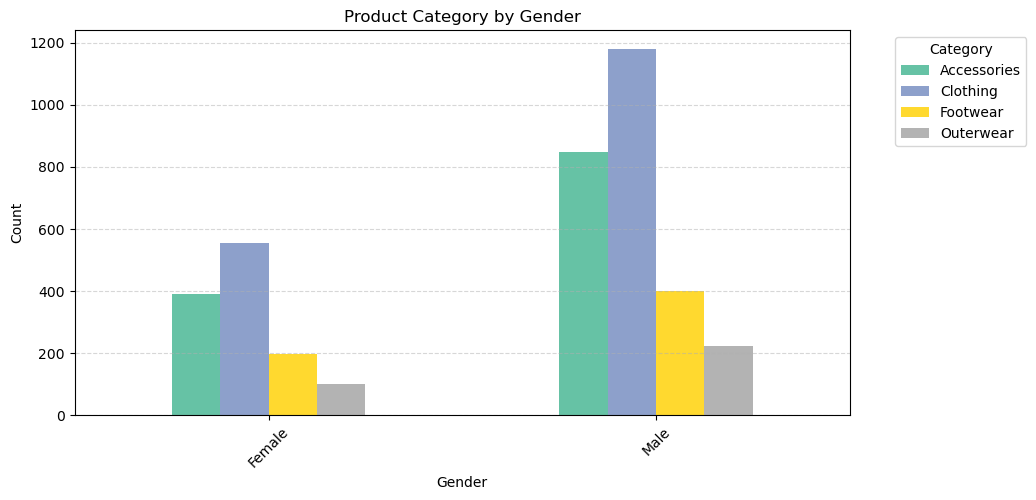

In [572]:
Product_Category_by_Gender.plot(kind="bar", figsize=(10, 5), colormap="Set2")
plt.title("Product Category by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [580]:
size_gender =pd.crosstab(shopping_trends.Gender, shopping_trends.Size)
size_gender

Size      L     M    S   XL
Gender                     
Female  337   590  187  134
Male    716  1165  476  295

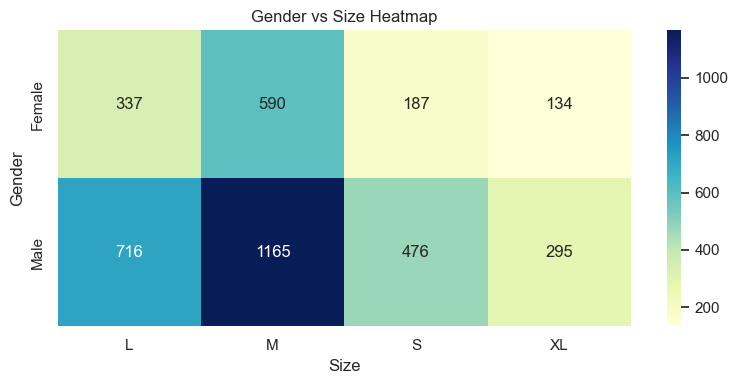

In [584]:
size_gender = pd.crosstab(shopping_trends["Gender"], shopping_trends["Size"])
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.heatmap(size_gender, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Gender vs Size Heatmap")
plt.xlabel("Size")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()


In [586]:
pd.crosstab(shopping_trends.Gender , shopping_trends.Color)

Color   Beige  Black  Blue  Brown  Charcoal  Cyan  Gold  Gray  Green  Indigo  \
Gender                                                                         
Female     40     54    52     46        50    47    41    53     56      45   
Male      107    113   100     95       103   119    97   106    113     102   

Color   ...  Peach  Pink  Purple  Red  Silver  Teal  Turquoise  Violet  White  \
Gender  ...                                                                     
Female  ...     48    58      42   44      52    53         40      53     45   
Male    ...    101    95     109  104     121   119        105     113     97   

Color   Yellow  
Gender          
Female      60  
Male       114  

[2 rows x 25 columns]

In [588]:
pd.crosstab(shopping_trends.Gender , shopping_trends["Payment Method"])

Payment Method  Bank Transfer  Cash  Credit Card  Debit Card  PayPal  Venmo
Gender                                                                     
Female                    204   197          223         207     203    214
Male                      428   451          473         426     435    439

In [627]:
pd.crosstab(shopping_trends.Gender , shopping_trends["Previous Purchases"])

Previous Purchases  1   2   3   4   5   6   7   8   9   10  ...  41  42  43  \
Gender                                                      ...               
Female              27  28  36  33  33  25  25  15  24  25  ...  29  26  22   
Male                56  44  55  58  54  62  40  52  41  51  ...  41  57  42   

Previous Purchases  44  45  46  47  48  49  50  
Gender                                          
Female              18  23  23  37  20  19  19  
Male                54  60  55  53  70  39  58  

[2 rows x 50 columns]

In [594]:
pd.crosstab(shopping_trends.Gender , shopping_trends["Frequency of Purchases"])

Frequency of Purchases  Annually  Bi-Weekly  Every 3 Months  Fortnightly  \
Gender                                                                     
Female                       185        188             186          163   
Male                         387        359             398          379   

Frequency of Purchases  Monthly  Quarterly  Weekly  
Gender                                              
Female                      185        169     172  
Male                        368        394     367

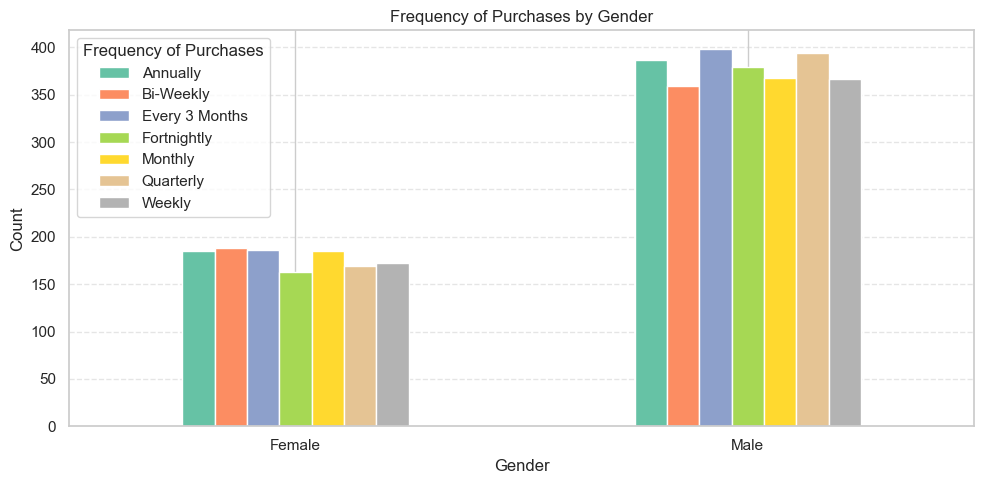

In [599]:
ct = pd.crosstab(shopping_trends["Gender"], shopping_trends["Frequency of Purchases"])
ct.plot(kind="bar", figsize=(10, 5), colormap="Set2")
plt.title("Frequency of Purchases by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [611]:
Subscription_Status_gender=pd.crosstab(shopping_trends.Gender , shopping_trends["Subscription Status"])
Subscription_Status_gender

Subscription Status    No   Yes
Gender                         
Female               1248     0
Male                 1599  1053

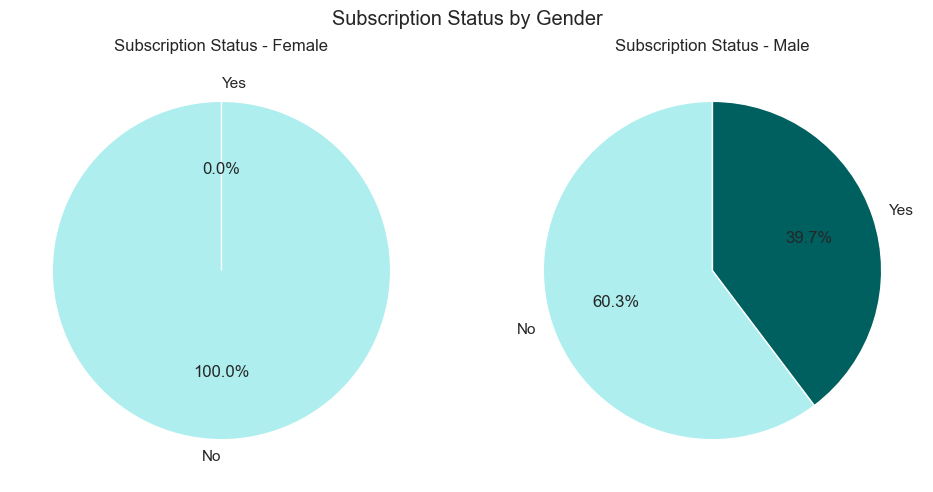

In [617]:
Subscription_Status_gender = pd.crosstab(shopping_trends["Gender"], shopping_trends["Subscription Status"])
fig, axes = plt.subplots(1, len(ct), figsize=(10, 5))
for i, gender in enumerate(Subscription_Status_gender.index):
    axes[i].pie(Subscription_Status_gender.loc[gender], labels=Subscription_Status_gender.columns, autopct='%1.1f%%', startangle=90, colors=["#AEEEEE", "#005F5F"])
    axes[i].set_title(f"Subscription Status - {gender}")
plt.suptitle("Subscription Status by Gender")
plt.tight_layout()
plt.show()


In [603]:
pd.crosstab(shopping_trends.Gender , shopping_trends["Preferred Payment Method"])

Preferred Payment Method  Bank Transfer  Cash  Credit Card  Debit Card  \
Gender                                                                   
Female                              203   212          223         181   
Male                                409   458          448         455   

Preferred Payment Method  PayPal  Venmo  
Gender                                   
Female                       221    208  
Male                         456    426

In [646]:
shopping_trends.sample()

Age Gender Item Purchased  Category  Purchase Amount (USD)  \
1591   18   Male          Skirt  Clothing                    100   

          Location Size Color  Season  Review Rating Subscription Status  \
1591  South Dakota    L  Gold  Winter            2.9                  No   

     Payment Method Shipping Type Discount Applied Promo Code Used  \
1591  Bank Transfer  Next Day Air              Yes             Yes   

      Previous Purchases Preferred Payment Method Frequency of Purchases  
1591                  24                   PayPal               Annually

In [676]:
pd.crosstab(shopping_trends.Size, shopping_trends["Item Purchased"])

Item Purchased  Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  Handbag  \
Size                                                                          
L                     35    39      46     40    45     47      35       34   
M                     76    66      75     70    66     77      66       72   
S                     18    37      29     21    36     27      22       29   
XL                    14    19      21     13    14     15      17       18   

Item Purchased  Hat  Hoodie  ...  Scarf  Shirt  Shoes  Shorts  Skirt  \
Size                         ...                                       
L                41      40  ...     45     41     47      46     53   
M                67      68  ...     65     86     66      67     67   
S                23      26  ...     28     20     22      27     27   
XL               23      17  ...     19     22     15      17     11   

Item Purchased  Sneakers  Socks  Sunglasses  Sweater  T-shirt  
Size                                                           
L                     46     40          39       42       41  
M                     56     74          73       77       66  
S                     21     26          36       27       24  
XL                    22     19          13       18       16  

[4 rows x 25 columns]

In [664]:
pd.crosstab(shopping_trends.Season, shopping_trends["Item Purchased"])

Item Purchased  Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  Handbag  \
Season                                                                        
Fall                  34    41      42     35    34     36      37       48   
Spring                39    41      46     40    46     43      42       36   
Summer                45    39      43     38    42     47      29       35   
Winter                25    40      40     31    39     40      32       34   

Item Purchased  Hat  Hoodie  ...  Scarf  Shirt  Shoes  Shorts  Skirt  \
Season                       ...                                       
Fall             50      36  ...     40     39     26      35     46   
Spring           27      36  ...     41     42     40      47     46   
Summer           37      31  ...     43     38     46      40     28   
Winter           40      48  ...     33     50     38      35     38   

Item Purchased  Sneakers  Socks  Sunglasses  Sweater  T-shirt  
Season                                                         
Fall                  31     42          39       42       39  
Spring                39     40          33       52       38  
Summer                36     42          37       28       30  
Winter                39     35          52       42       40  

[4 rows x 25 columns]

In [688]:
Discount_item =pd.crosstab(shopping_trends["Discount Applied"], shopping_trends["Item Purchased"])
Discount_item

Item Purchased    Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  Handbag  \
Discount Applied                                                                
No                      79    89     113     77    82     91      80       92   
Yes                     64    72      58     67    79     75      60       61   

Item Purchased    Hat  Hoodie  ...  Scarf  Shirt  Shoes  Shorts  Skirt  \
Discount Applied               ...                                       
No                 77      83  ...     90     98     89      89     97   
Yes                77      68  ...     67     71     61      68     61   

Item Purchased    Sneakers  Socks  Sunglasses  Sweater  T-shirt  
Discount Applied                                                 
No                      73    107          95       85       86  
Yes                     72     52          66       79       61  

[2 rows x 25 columns]

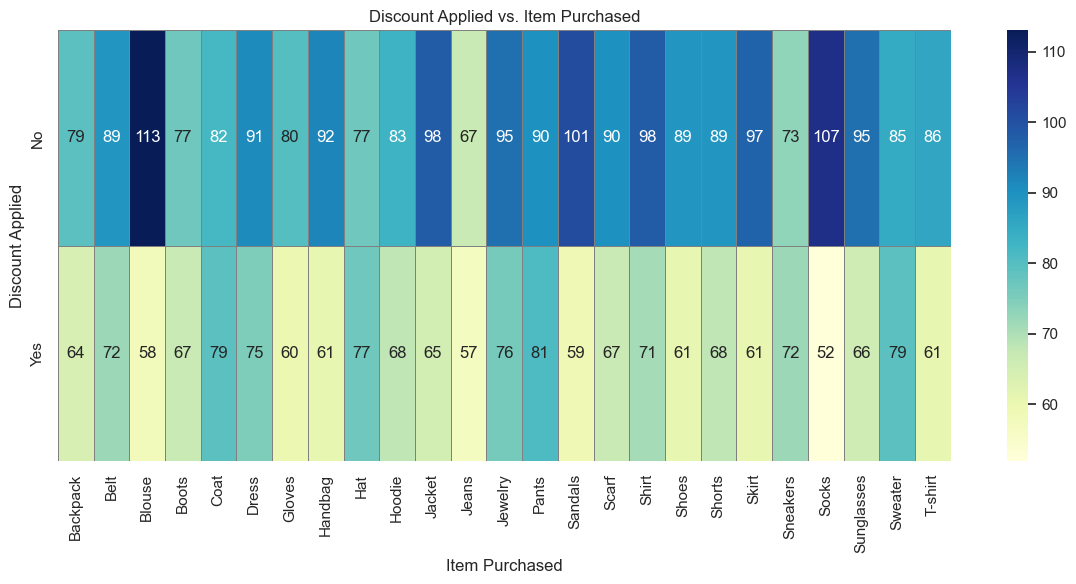

In [690]:
plt.figure(figsize=(12, 6))
sns.heatmap(Discount_item, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Discount Applied vs. Item Purchased")
plt.xlabel("Item Purchased")
plt.ylabel("Discount Applied")
plt.tight_layout()
plt.show()


In [704]:
pd.crosstab(shopping_trends["Payment Method"] , shopping_trends["Item Purchased"])

Item Purchased  Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  Handbag  \
Payment Method                                                                
Bank Transfer         23    22      32     18    25     26      27       22   
Cash                  23    28      19     20    28     19      28       24   
Credit Card           25    32      35     14    25     32      27       29   
Debit Card            22    28      24     35    33     26      14       31   
PayPal                23    19      26     28    25     30      25       29   
Venmo                 27    32      35     29    25     33      19       18   

Item Purchased  Hat  Hoodie  ...  Scarf  Shirt  Shoes  Shorts  Skirt  \
Payment Method               ...                                       
Bank Transfer    23      28  ...     34     28     36      27     27   
Cash             21      24  ...     22     29     19      31     26   
Credit Card      28      27  ...     32     23     28      30     25   
Debit Card       31      28  ...     27     27     13      29     29   
PayPal           25      19  ...     18     31     31      15     28   
Venmo            26      25  ...     24     31     23      25     23   

Item Purchased  Sneakers  Socks  Sunglasses  Sweater  T-shirt  
Payment Method                                                 
Bank Transfer         21     26          24       23       26  
Cash                  24     27          21       26       26  
Credit Card           23     30          41       29       37  
Debit Card            18     32          20       21       22  
PayPal                26     27          26       33       17  
Venmo                 33     17          29       32       19  

[6 rows x 25 columns]

In [696]:
shopping_trends.sample()

Age  Gender Item Purchased     Category  Purchase Amount (USD) Location  \
3618   28  Female         Gloves  Accessories                     67   Nevada   

     Size   Color Season  Review Rating Subscription Status Payment Method  \
3618    M  Maroon   Fall            4.0                  No          Venmo   

       Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
3618  2-Day Shipping               No              No                  47   

     Preferred Payment Method Frequency of Purchases  
3618                   PayPal              Bi-Weekly

In [751]:
shopping_trends.groupby("Category")["Purchase Amount (USD)"].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

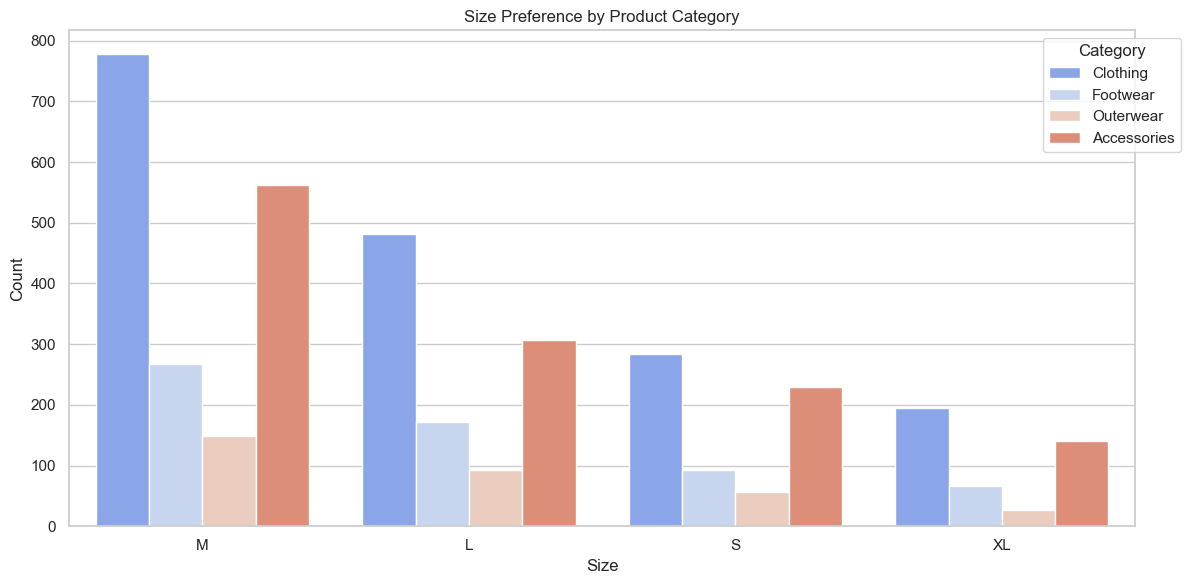

In [861]:
plt.figure(figsize=(12, 6))
sns.countplot(data=shopping_trends,x='Size',hue='Category',order=shopping_trends['Size'].value_counts().index,palette="coolwarm") 
plt.title('Size Preference by Product Category')
plt.xlabel('Size')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [771]:
shopping_trends.groupby("Color")["Category"].value_counts()

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

In [749]:
pd.crosstab(shopping_trends.Season , shopping_trends.Category )

Category  Accessories  Clothing  Footwear  Outerwear
Season                                              
Fall              324       427       136         88
Spring            301       454       163         81
Summer            312       408       160         75
Winter            303       448       140         80

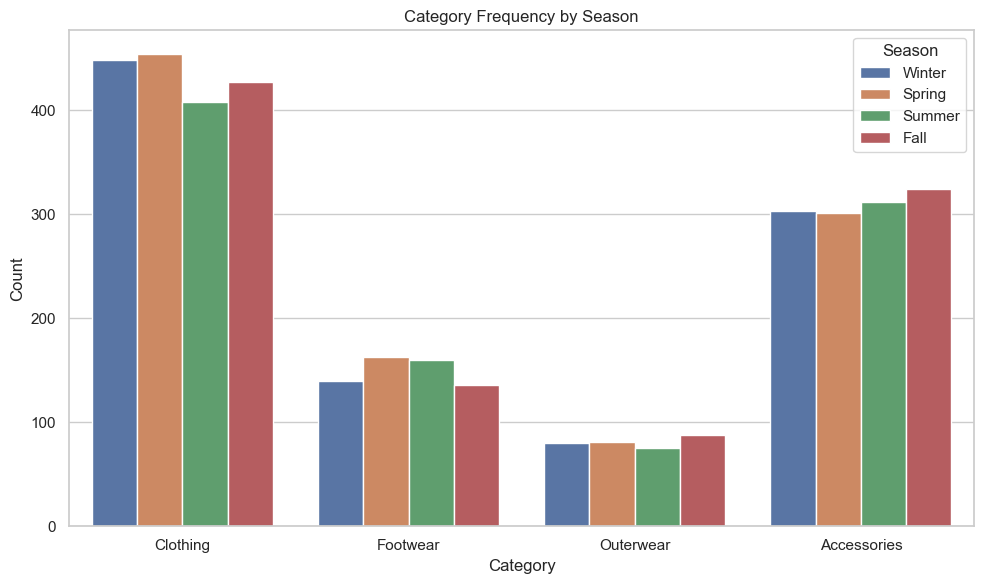

In [851]:
plt.figure(figsize=(10, 6))
sns.countplot(data=shopping_trends, x="Category", hue="Season")
plt.title("Category Frequency by Season")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Season")
plt.tight_layout()
plt.show()


In [706]:
pd.crosstab(shopping_trends["Payment Method"] , shopping_trends["Category"])

Category        Accessories  Clothing  Footwear  Outerwear
Payment Method                                            
Bank Transfer           198       291        98         45
Cash                    200       281       105         62
Credit Card             245       319        84         48
Debit Card              195       286        91         61
PayPal                  199       274       113         52
Venmo                   203       286       108         56

In [702]:
pd.crosstab(shopping_trends["Discount Applied"] , shopping_trends.Category)

Category          Accessories  Clothing  Footwear  Outerwear
Discount Applied                                            
No                        697      1006       340        180
Yes                       543       731       259        144

In [708]:
pd.crosstab(shopping_trends["Shipping Type"] , shopping_trends.Category)

Category        Accessories  Clothing  Footwear  Outerwear
Shipping Type                                             
2-Day Shipping          206       281        90         50
Express                 203       290        96         57
Free Shipping           195       294       122         64
Next Day Air            211       293        93         51
Standard                208       297       100         49
Store Pickup            217       282        98         53

In [743]:
Promo_Code = pd.crosstab(shopping_trends["Promo Code Used"], shopping_trends["Category"])
Promo_Code

Category         Accessories  Clothing  Footwear  Outerwear
Promo Code Used                                            
No                       697      1006       340        180
Yes                      543       731       259        144

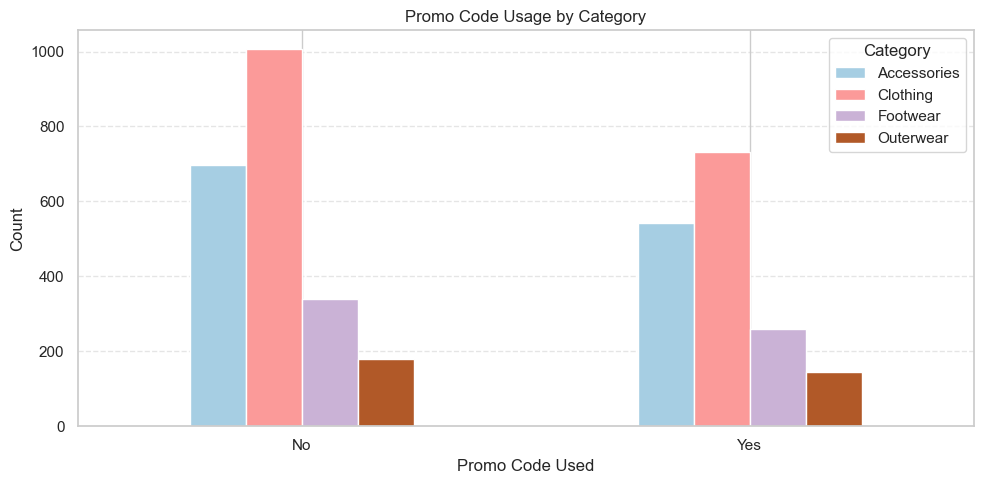

In [745]:
Promo_Code.plot(kind="bar", figsize=(10, 5), colormap="Paired")

plt.title("Promo Code Usage by Category")
plt.xlabel("Promo Code Used")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [753]:
pd.crosstab(shopping_trends["Frequency of Purchases"], shopping_trends["Category"])

Category                Accessories  Clothing  Footwear  Outerwear
Frequency of Purchases                                            
Annually                        184       258        87         43
Bi-Weekly                       180       247        80         40
Every 3 Months                  180       265        92         47
Fortnightly                     170       223        96         53
Monthly                         171       263        75         44
Quarterly                       189       239        83         52
Weekly                          166       242        86         45

In [757]:
shopping_trends.sample()

Age Gender Item Purchased     Category  Purchase Amount (USD)  Location  \
962   29   Male     Sunglasses  Accessories                     64  Michigan   

    Size  Color  Season  Review Rating Subscription Status Payment Method  \
962    L  Green  Spring            4.4                 Yes           Cash   

    Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
962      Standard              Yes             Yes                  26   

    Preferred Payment Method Frequency of Purchases  
962               Debit Card            Fortnightly

In [765]:
shopping_trends.groupby("Season")["Purchase Amount (USD)"].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

In [767]:
shopping_trends.groupby("Size")["Purchase Amount (USD)"].mean()

Size
L     58.563153
M     59.924217
S     61.037707
XL    60.090909
Name: Purchase Amount (USD), dtype: float64

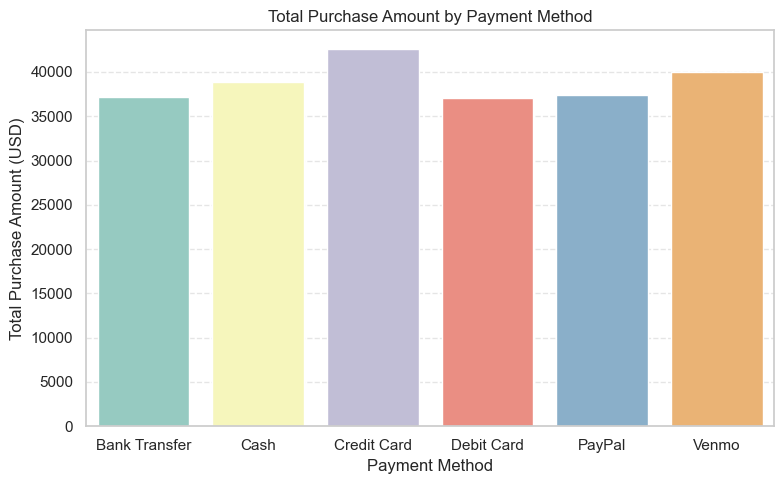

In [819]:
payment_totals = shopping_trends.groupby("Payment Method")["Purchase Amount (USD)"].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=payment_totals, x="Payment Method", y="Purchase Amount (USD)", palette="Set3")
plt.title("Total Purchase Amount by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Total Purchase Amount (USD)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [821]:
shopping_trends.to_excel("shopping_trends_output.xlsx", index=False)

In [829]:
data = pd.read_excel("shopping_trends_output.xlsx")